# U.S. Medical Insurance Costs

In [1]:
import pandas as pd
import numpy as np

insurance_data = pd.read_csv("insurance.csv")
print(insurance_data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


## SUMMARY STATISTICS ON DATA

### Number of Patients in each region:

In [2]:
new = insurance_data.region.value_counts().reset_index()

In [3]:
new

,index,region
0,southeast,364
1,northwest,325
2,southwest,325
3,northeast,324


In [4]:
for i in range(len(new)):
    print(new['index'][i], ':', new['region'][i])

southeast : 364
northwest : 325
southwest : 325
northeast : 324


### Number of Male and Female Patients in each region:

In [5]:
data = insurance_data.groupby(['region', 'sex']).age.count().reset_index()
pivoted = data.pivot(columns='sex', index='region', values='age')

print(pivoted)

sex        female  male
region                 
northeast     161   163
northwest     164   161
southeast     175   189
southwest     162   163


### Percentage of smokers and non-smokers in each region:

In [6]:
data1 = pd.crosstab(insurance_data.smoker, insurance_data.region, normalize=True) * 100
np.round(data1, 2)

region,northeast,northwest,southeast,southwest
smoker,,,,
no,19.21,19.96,20.4,19.96
yes,5.01,4.33,6.8,4.33


## DATA VISUALIZATION

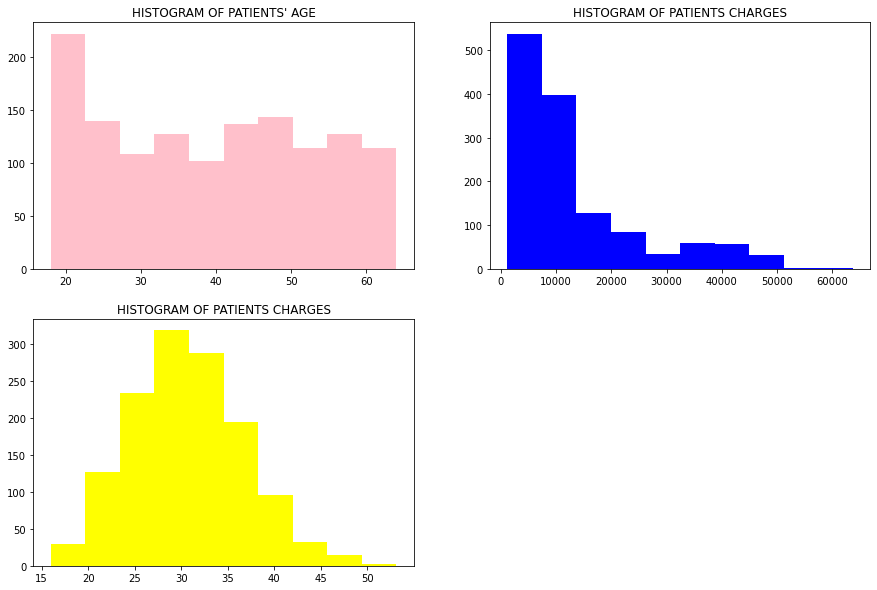

In [7]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.hist(insurance_data.age, range=(18, 64), bins=10, color='pink')
plt.title("HISTOGRAM OF PATIENTS' AGE")

plt.subplot(2,2,2)
plt.hist(insurance_data.charges, color='blue')
plt.title('HISTOGRAM OF PATIENTS CHARGES')

plt.subplot(2,2,3)
plt.hist(insurance_data.bmi, color='yellow')
plt.title('HISTOGRAM OF PATIENTS CHARGES')

plt.show()

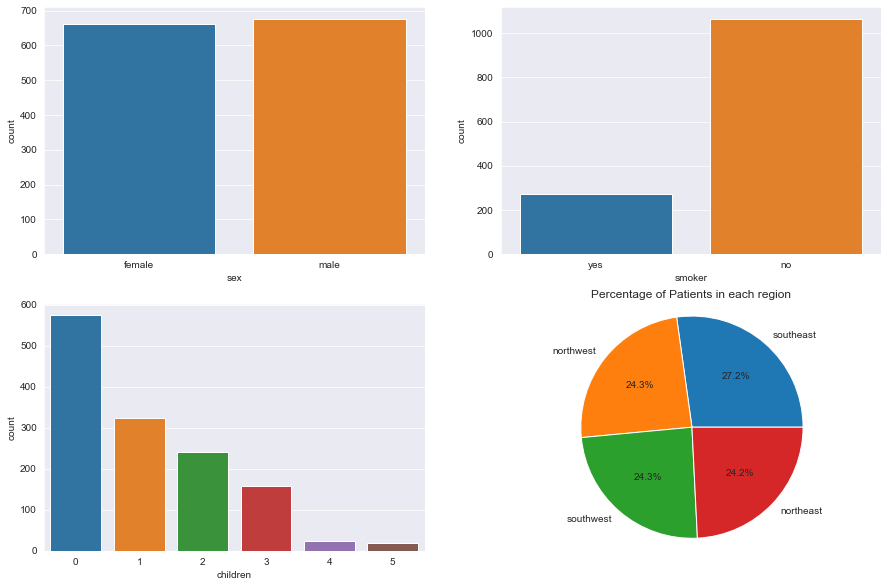

In [8]:
import seaborn as sns

sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
a = 1
for i in insurance_data[['sex', 'smoker', 'children']]:
    plt.subplot(2,2,a)
    sns.countplot(data=insurance_data, x=i)
    a += 1

# Visualizing the region column:
plt.subplot(2,2,4)
df4 = insurance_data.region.value_counts().reset_index()
df4 = df4.rename(columns={'index':'name'})
region = [name for name in df4.name]
plt.pie(df4.region, labels=region, autopct='%0.1f%%')
plt.axis('equal')
plt.title('Percentage of Patients in each region')
plt.show()

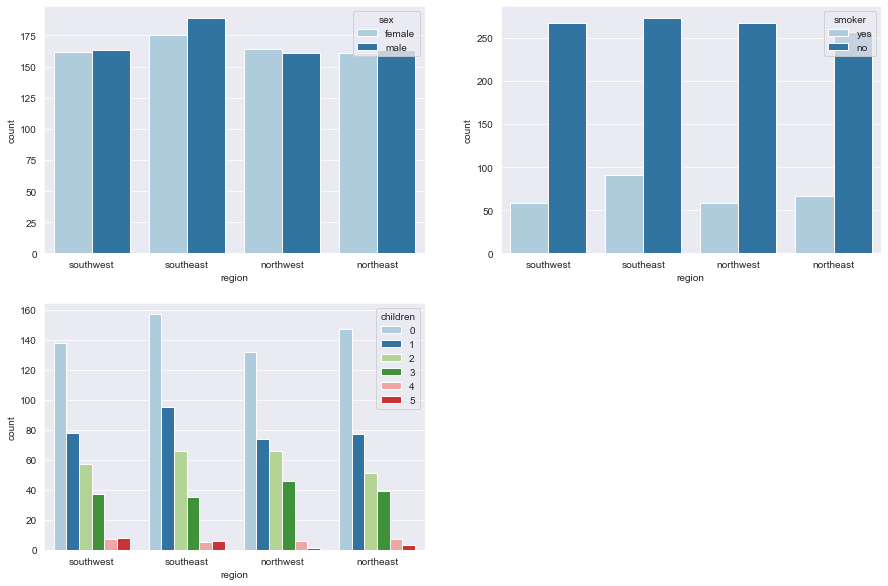

In [9]:
import seaborn as sns

sns.set_style('darkgrid')
sns.set_palette('Paired')
plt.figure(figsize=(15,10))
a = 1
for i in insurance_data[['sex', 'smoker', 'children']]:
    plt.subplot(2,2,a)
    sns.countplot(data=insurance_data, x='region', hue=i)
    a += 1
plt.show()

## INSPECTING ASSOCIATION

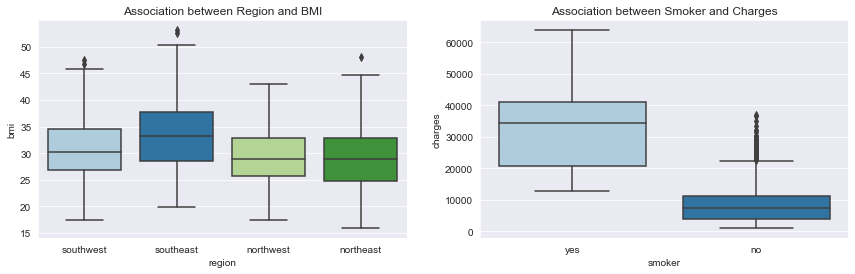

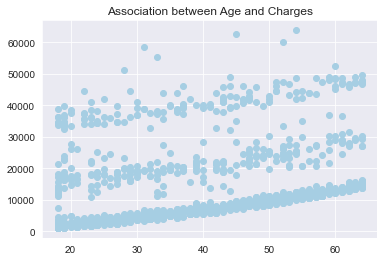


Association between Sex and Smoker.............................
smoker   no  yes
sex             
female  547  115
male    517  159 



In [10]:
from scipy.stats import chi2_contingency

# Checking for association between region and bmi:
plt.clf()
plt.subplot(1,2,1)
sns.boxplot(data=insurance_data, x=insurance_data.region, y=insurance_data.bmi)
plt.title('Association between Region and BMI')
plt.subplots_adjust(right=2)

# Checking for association between smoker and charges:
plt.subplot(1,2,2)
sns.boxplot(data=insurance_data, x=insurance_data.smoker, y=insurance_data.charges)
plt.title('Association between Smoker and Charges')
plt.show()

# Checking for association between age and charges:
plt.clf()
plt.scatter(x=insurance_data.age, y=insurance_data.charges)
plt.title('Association between Age and Charges')
plt.show()
print()

# Checking for association between sex and smoker:
print('Association between Sex and Smoker.............................')
sex_smoker_freq = pd.crosstab(insurance_data.sex, insurance_data.smoker)
print(sex_smoker_freq,"\n")

## PEFORMING LINEAR REGRESSION MODEL

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

insurance_data = pd.read_csv("insurance.csv")

insurance_data['smoker'] = insurance_data['smoker'].map({'yes':1, 'no':0})
insurance_data = insurance_data.dropna(subset=['age', 'smoker'])

features = insurance_data[['age', 'smoker']]
outcome = insurance_data[['charges']]
features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size = 0.8, random_state=122)
model = LinearRegression()
model.fit(features_train, outcome_train)

print("Model Score:")
print(model.score(features_test, outcome_test), '\n')

print('Predicting the charge of a person of age 25 and the person been a smoker:')
print(model.predict([[25, 1]]))

Model Score:
0.779606400572379 

Predicting the charge of a person of age 25 and the person been a smoker:
[[27783.50212175]]
